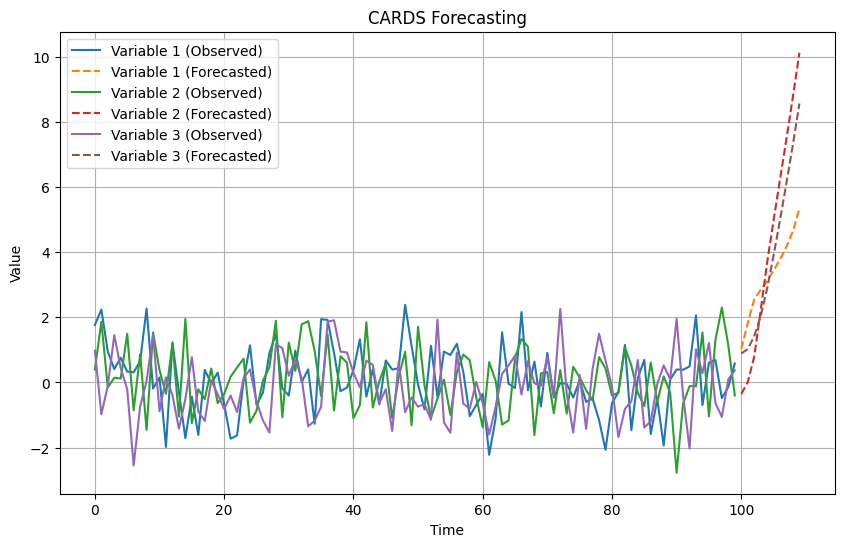

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
np.random.seed(0)
n_samples = 100
n_features = 3  # Number of variables
Y = np.random.randn(n_samples, n_features)

# Define autoregressive coefficients
Phi = np.array([[0.7, 0.2, 0.3],
                [0.1, 0.6, 0.4],
                [0.3, 0.4, 0.5]])

# Define nonlinear dynamical interactions (arbitrary functions for demonstration)
def f1(Y_prev):
    return np.sin(Y_prev[0])

def f2(Y_prev):
    return np.tanh(Y_prev[1])

def f3(Y_prev):
    return np.exp(-Y_prev[2])

# Define CARDS model
def cards_model(Y_prev, Phi, f_funcs):
    """
    CARDS model.
    
    Parameters:
    - Y_prev: Previous time step values of the variables (numpy array).
    - Phi: Autoregressive coefficients (numpy array).
    - f_funcs: List of functions representing nonlinear dynamical interactions.
    
    Returns:
    - Y_pred: Predicted values for the current time step (numpy array).
    """
    autoregressive_term = np.dot(Y_prev, Phi)
    nonlinear_terms = np.array([f(Y_prev) for f in f_funcs]).T
    Y_pred = autoregressive_term + nonlinear_terms
    return Y_pred

# Forecast future values using the CARDS model
forecast_horizon = 10
Y_forecast = np.zeros((forecast_horizon, n_features))
Y_current = Y[-1, :]  # Start with the last observed values

for t in range(forecast_horizon):
    Y_forecast[t, :] = cards_model(Y_current, Phi, [f1, f2, f3])
    Y_current = Y_forecast[t, :]  # Update current values for next prediction

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))
for i in range(n_features):
    plt.plot(range(n_samples), Y[:, i], label=f'Variable {i+1} (Observed)')
    plt.plot(range(n_samples, n_samples + forecast_horizon), Y_forecast[:, i], label=f'Variable {i+1} (Forecasted)', linestyle='--')
plt.title('CARDS Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
